# PyCIEMSS sample interface with different ODE solvers

### Load dependencies and interfaces

In [1]:
import os
import pyciemss
import pyciemss.visuals.plots as plots
import time
import pyro

smoke_test = "CI" in os.environ

### Select model

In [2]:
MODEL_PATH = "https://raw.githubusercontent.com/DARPA-ASKEM/simulation-integration/main/data/models/"
model = os.path.join(MODEL_PATH, "SEIRHD_NPI_Type1_petrinet.json")

### Set parameters for sampling

In [3]:
start_time = 0.0
end_time = 40.0
logging_step_size = 1.0
num_samples = 3 if smoke_test else 100

## Baseline samples before optimization from model 2 using different ODE solvers

### Euler with step size 0.1

Time taken:  2.586632013320923


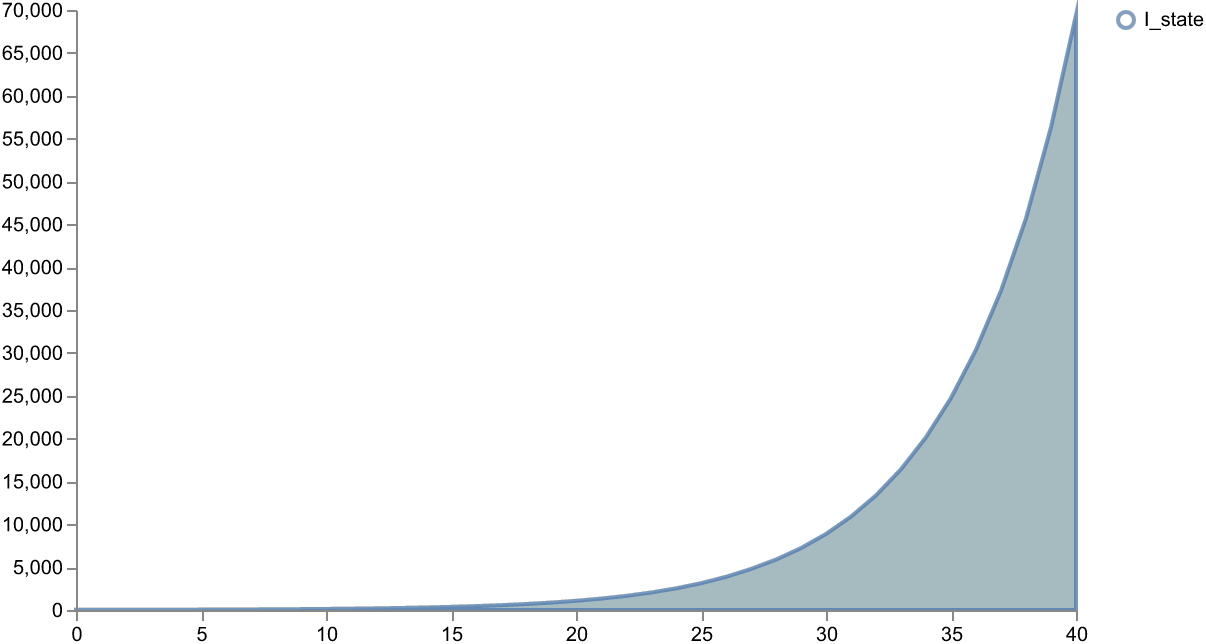

In [4]:
start_t = time.time()
with pyro.poutine.seed(rng_seed=0):
    sample_results2 = pyciemss.sample(
        model,
        end_time,
        logging_step_size,
        num_samples,
        start_time=start_time,
        solver_method="euler",
        solver_options={"step_size": 0.1}
    )
print("Time taken: ", time.time()-start_t)
# display(sample_results2["data"])
# Plot results for all states
schema = plots.trajectories(sample_results2["data"], keep="I_state")
plots.ipy_display(schema, dpi=150)

### Euler with step size 0.001

Time taken:  180.76885199546814


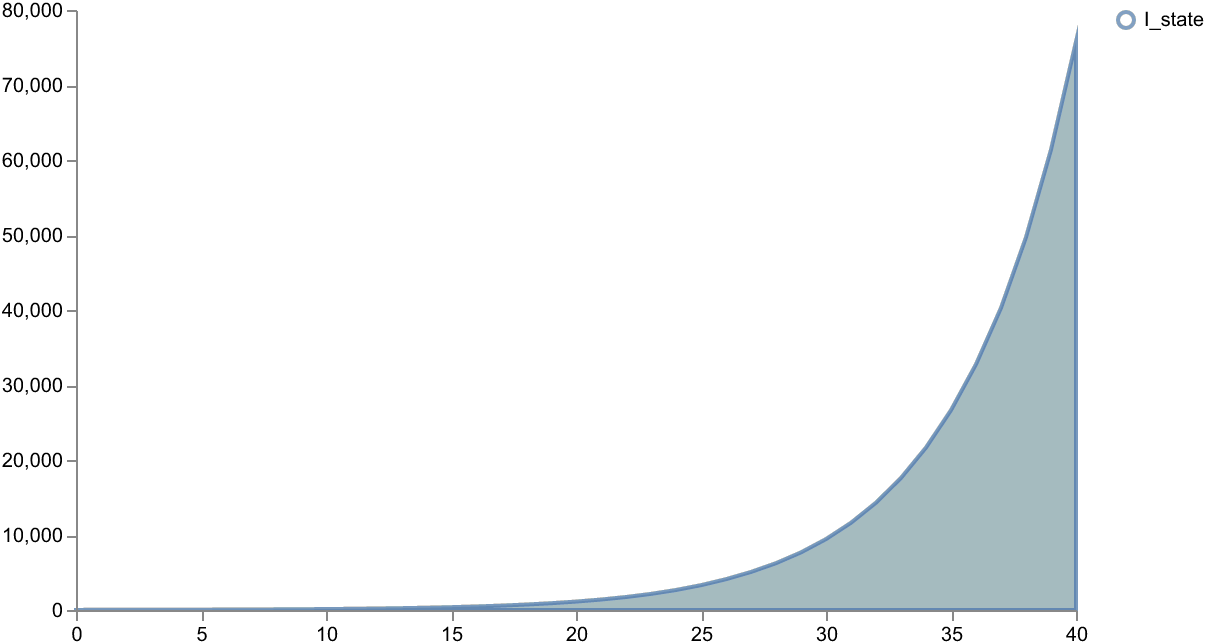

In [5]:
start_t = time.time()
with pyro.poutine.seed(rng_seed=0):
    sample_results2 = pyciemss.sample(
        model,
        end_time,
        logging_step_size,
        num_samples,
        start_time=start_time,
        solver_method="euler",
        solver_options={"step_size": 0.001}
    )
print("Time taken: ", time.time()-start_t)
# display(sample_results2["data"])
# Plot results for all states
schema = plots.trajectories(sample_results2["data"], keep="I_state")
plots.ipy_display(schema, dpi=150)

### RK4 with step size 1

Time taken:  1.0399749279022217


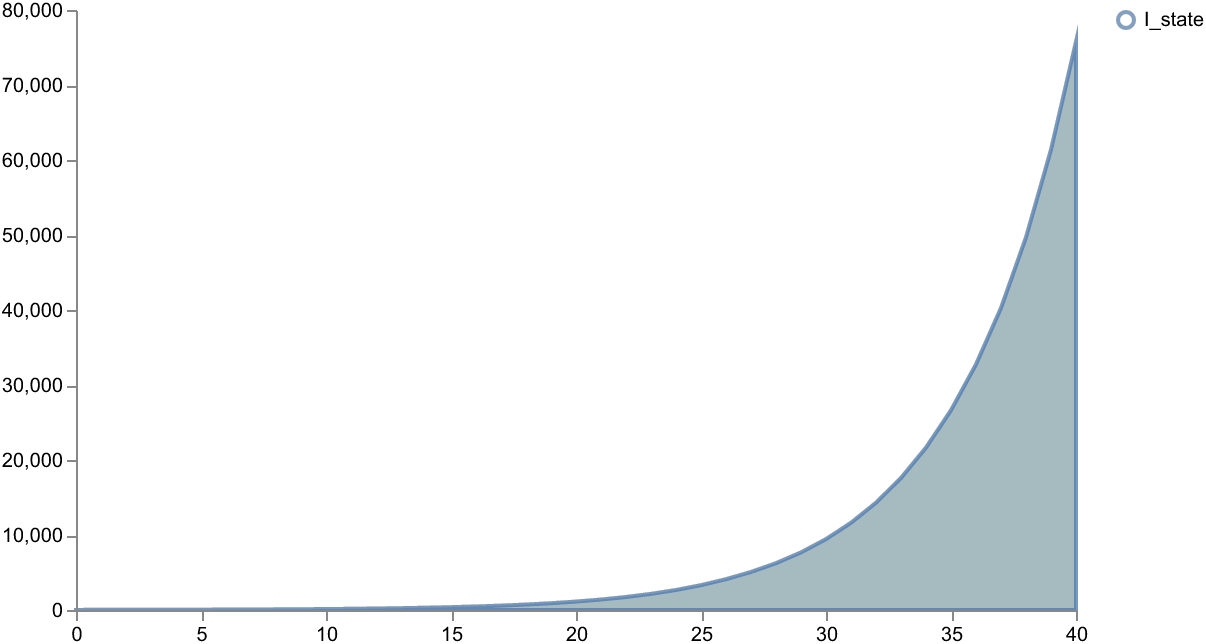

In [6]:
start_t = time.time()
with pyro.poutine.seed(rng_seed=0):
    sample_results2 = pyciemss.sample(
        model,
        end_time,
        logging_step_size,
        num_samples,
        start_time=start_time,
        solver_method="rk4",
        solver_options={"step_size": 1.}
    )
print("Time taken: ", time.time()-start_t)
# display(sample_results2["data"])
# Plot results for all states
schema = plots.trajectories(sample_results2["data"], keep="I_state")
plots.ipy_display(schema, dpi=150)

### RK4 with step size 0.001

Time taken:  671.1473340988159


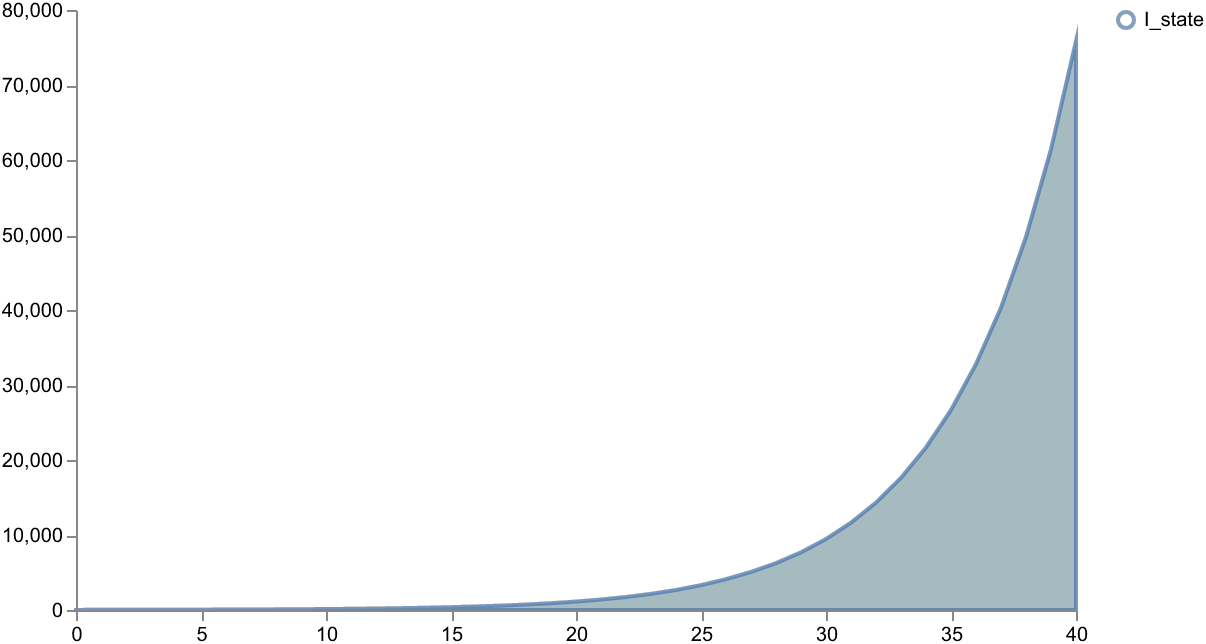

In [7]:
start_t = time.time()
with pyro.poutine.seed(rng_seed=0):
    sample_results2 = pyciemss.sample(
        model,
        end_time,
        logging_step_size,
        num_samples,
        start_time=start_time,
        solver_method="rk4",
        solver_options={"step_size": 0.001}
    )
print("Time taken: ", time.time()-start_t)
# display(sample_results2["data"])
# Plot results for all states
schema = plots.trajectories(sample_results2["data"], keep="I_state")
plots.ipy_display(schema, dpi=150)

### dopri5 (adaptive-step solver)

Time taken:  2.1119260787963867


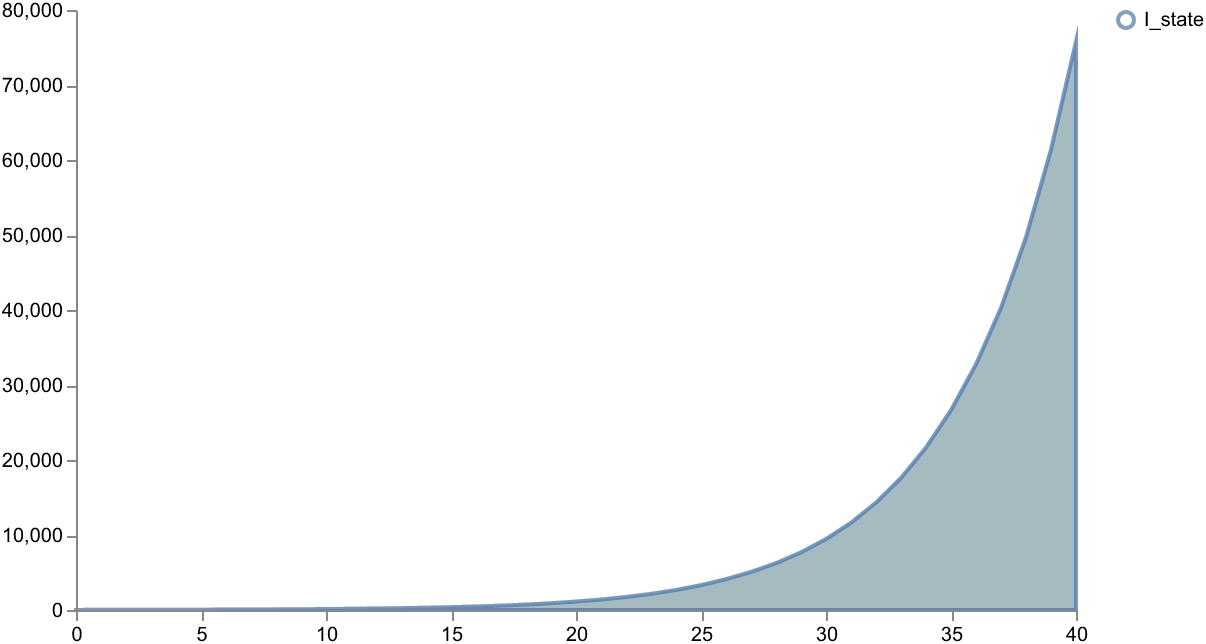

In [8]:
start_t = time.time()
with pyro.poutine.seed(rng_seed=0):
    sample_results2 = pyciemss.sample(
        model,
        end_time,
        logging_step_size,
        num_samples,
        start_time=start_time,
        solver_method="dopri5",
    )
print("Time taken: ", time.time()-start_t)
# display(sample_results2["data"])
# Plot results for all states
schema = plots.trajectories(sample_results2["data"], keep="I_state")
plots.ipy_display(schema, dpi=150)

### Explicit Adams-Bashforth solver with step size 0.1

Time taken:  2.1734249591827393


/Users/oost464/opt/anaconda3/envs/complex_simulation_env/lib/python3.10/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


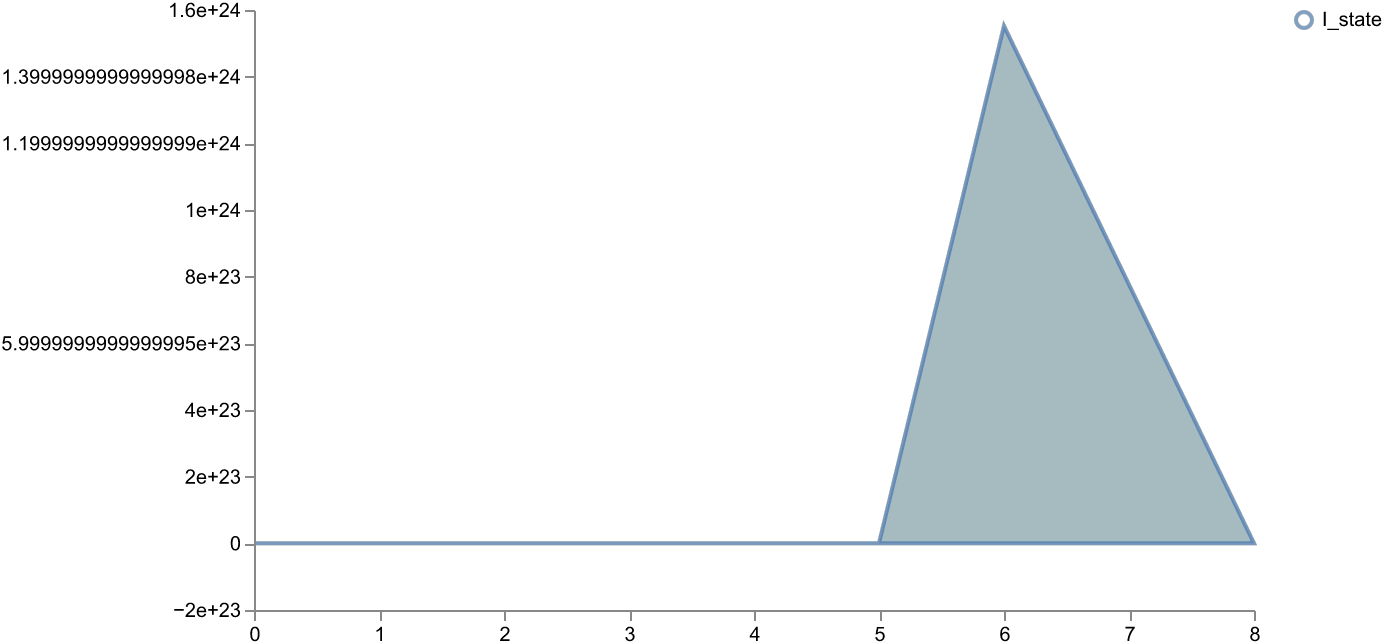

In [9]:
start_t = time.time()
with pyro.poutine.seed(rng_seed=0):
    sample_results2 = pyciemss.sample(
        model,
        end_time,
        logging_step_size,
        num_samples,
        start_time=start_time,
        solver_method="explicit_adams",
        solver_options={"step_size": 0.1},
    )
print("Time taken: ", time.time()-start_t)
# display(sample_results2["data"])
# Plot results for all states
schema = plots.trajectories(sample_results2["data"], keep="I_state")
plots.ipy_display(schema, dpi=150)

### Implicit Adams-Bashforth-Moulton solver with step size 0.1

/Users/oost464/opt/anaconda3/envs/complex_simulation_env/lib/python3.10/site-packages/torchdiffeq/_impl/fixed_adams.py:220: UserWarning: Functional iteration did not converge. Solution may be incorrect.
  warnings.warn('Functional iteration did not converge. Solution may be incorrect.')
/Users/oost464/opt/anaconda3/envs/complex_simulation_env/lib/python3.10/site-packages/torchdiffeq/_impl/fixed_adams.py:220: UserWarning: Functional iteration did not converge. Solution may be incorrect.
  warnings.warn('Functional iteration did not converge. Solution may be incorrect.')
/Users/oost464/opt/anaconda3/envs/complex_simulation_env/lib/python3.10/site-packages/torchdiffeq/_impl/fixed_adams.py:220: UserWarning: Functional iteration did not converge. Solution may be incorrect.
  warnings.warn('Functional iteration did not converge. Solution may be incorrect.')
/Users/oost464/opt/anaconda3/envs/complex_simulation_env/lib/python3.10/site-packages/torchdiffeq/_impl/fixed_adams.py:220: UserWarning:

Time taken:  8.087062120437622


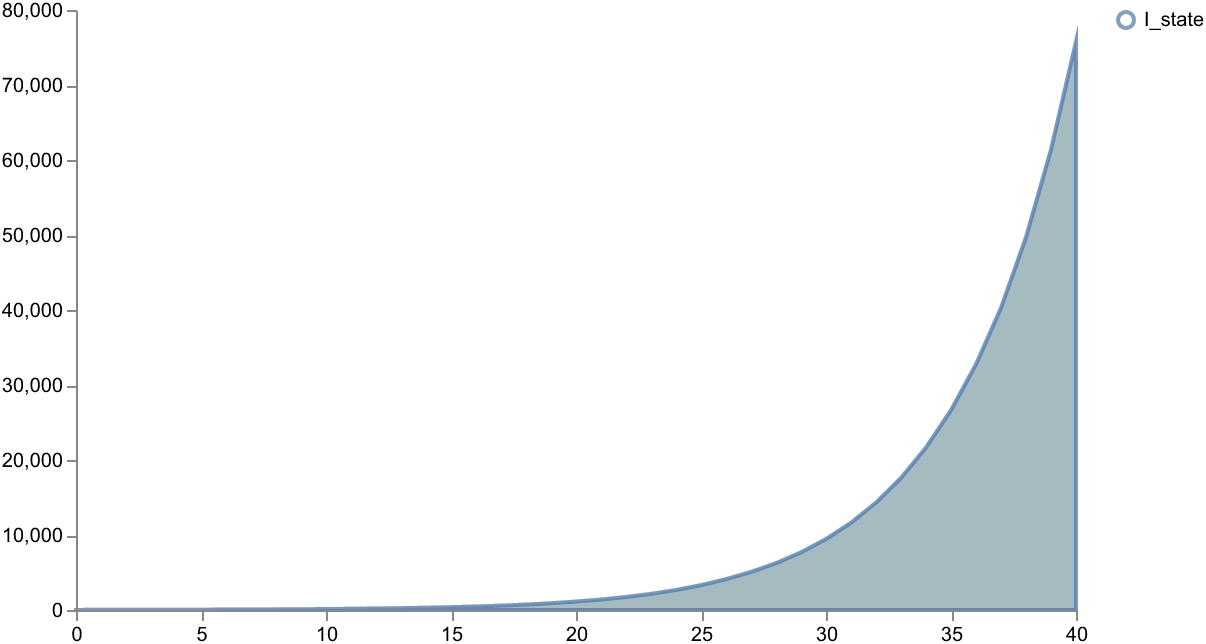

In [10]:
start_t = time.time()
with pyro.poutine.seed(rng_seed=0):
    sample_results2 = pyciemss.sample(
        model,
        end_time,
        logging_step_size,
        num_samples,
        start_time=start_time,
        solver_method="implicit_adams",
        solver_options={"step_size": 0.1},
    )
print("Time taken: ", time.time()-start_t)
# display(sample_results2["data"])
# Plot results for all states
schema = plots.trajectories(sample_results2["data"], keep="I_state")
plots.ipy_display(schema, dpi=150)

### Scipy solve_ivp with RK45 (adaptive-step)

/Users/oost464/opt/anaconda3/envs/complex_simulation_env/lib/python3.10/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: The following arguments have no effect for a chosen solver: `min_step`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)
/Users/oost464/opt/anaconda3/envs/complex_simulation_env/lib/python3.10/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: The following arguments have no effect for a chosen solver: `min_step`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)
/Users/oost464/opt/anaconda3/envs/complex_simulation_env/lib/python3.10/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: The following arguments have no effect for a chosen solver: `min_step`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)
/Users/oost464/opt/anaconda3/envs/complex_simulation_env/lib/python3.10/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: The following arguments have no effect for a chos

Time taken:  1.757256031036377


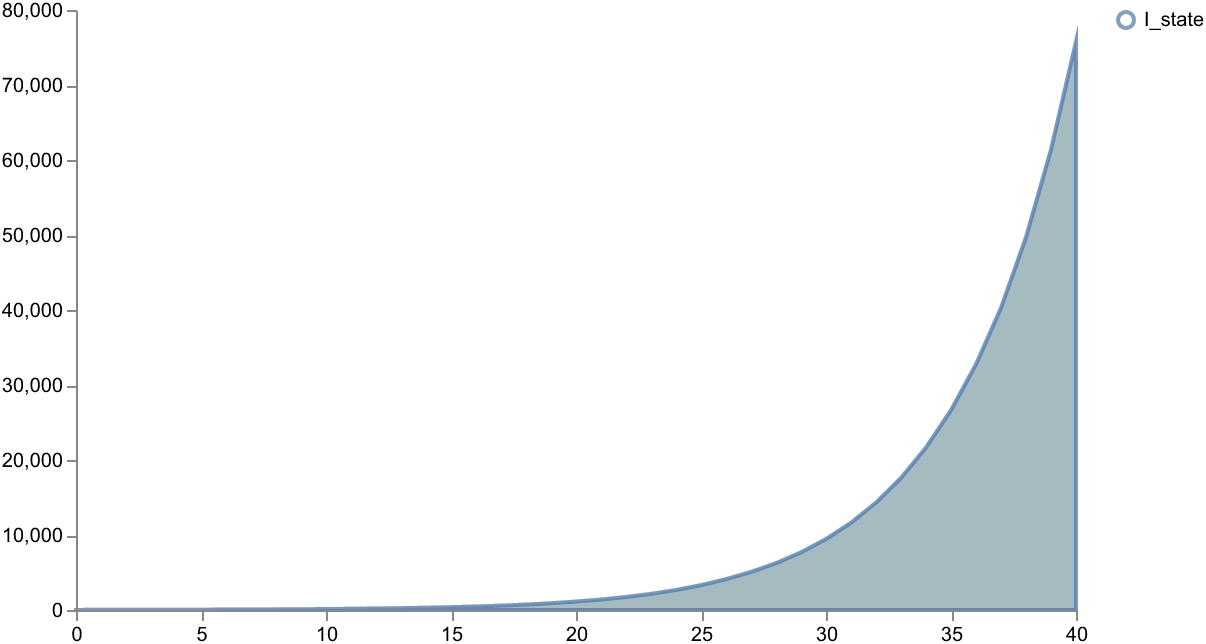

In [11]:
start_t = time.time()
with pyro.poutine.seed(rng_seed=0):
    sample_results2 = pyciemss.sample(
        model,
        end_time,
        logging_step_size,
        num_samples,
        start_time=start_time,
        solver_method="scipy_solver",
        solver_options={"solver": "RK45"}
    )
print("Time taken: ", time.time()-start_t)
# display(sample_results2["data"])
# Plot results for all states
schema = plots.trajectories(sample_results2["data"], keep="I_state")
plots.ipy_display(schema, dpi=150)

### Scipy solve_ivp with LSODA (automatic switching between solvers for stiff and nonstiff ODEs)

Time taken:  1.4867238998413086


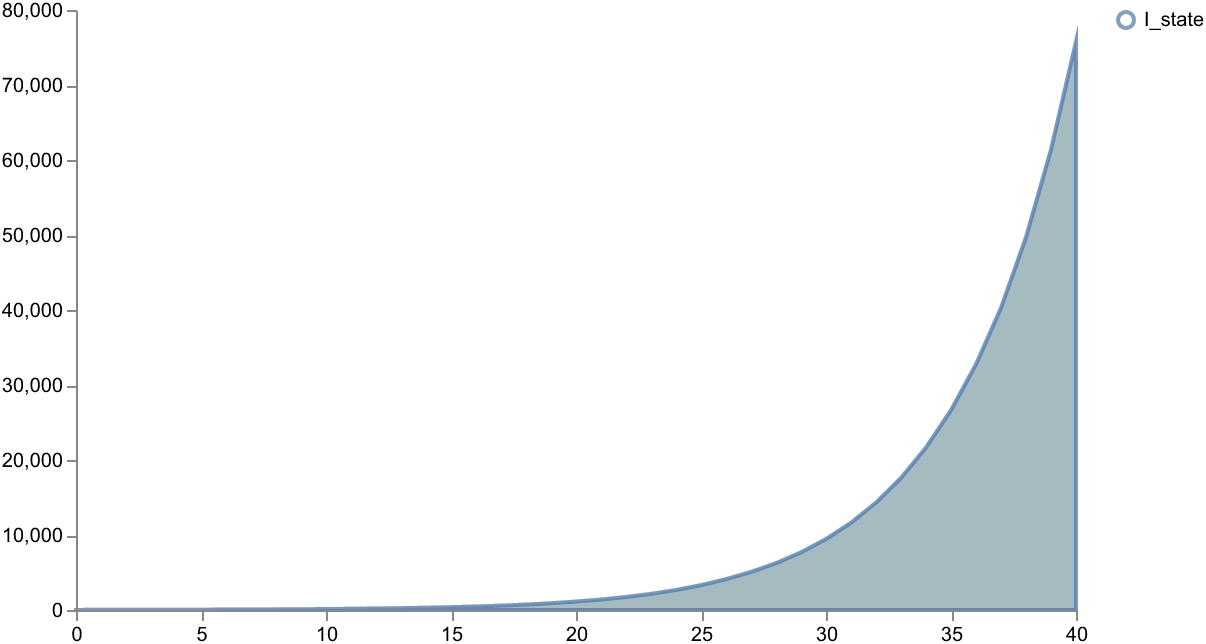

In [12]:
start_t = time.time()
with pyro.poutine.seed(rng_seed=0):
    sample_results2 = pyciemss.sample(
        model,
        end_time,
        logging_step_size,
        num_samples,
        start_time=start_time,
        solver_method="scipy_solver",
        solver_options={"solver": "LSODA"}
    )
print("Time taken: ", time.time()-start_t)
# display(sample_results2["data"])
# Plot results for all states
schema = plots.trajectories(sample_results2["data"], keep="I_state")
plots.ipy_display(schema, dpi=150)